IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import learning_curve

MEMBUAT DATASET DAN 10 FITUR NUMERIK

In [2]:
# Membuat dataset contoh
np.random.seed(42)  # Untuk reproduktifitas

# Jumlah sampel
n_samples = 1000

# Membuat fitur numerik
data = {
    'energy': np.random.uniform(0, 10, n_samples),  # Energi total
    'peak_amplitude': np.random.uniform(0, 5, n_samples),  # Amplitudo puncak
    'mean': np.random.uniform(0, 3, n_samples),  # Rata-rata
    'std_dev': np.random.uniform(0, 1, n_samples),  # Deviasi standar
    'skewness': np.random.uniform(-1, 1, n_samples),  # Kemiringan
    'kurtosis': np.random.uniform(-1, 1, n_samples),  # Ketajaman
    'frequency': np.random.uniform(0, 50, n_samples),  # Frekuensi dominan
    'duration': np.random.uniform(0.1, 5, n_samples),  # Durasi
    'snr': np.random.uniform(0, 20, n_samples),  # Rasio sinyal terhadap noise
    'zero_crossing_rate': np.random.uniform(0, 1, n_samples),  # Frekuensi melewati nol
}

# Membuat label biner (0 untuk latar belakang, 1 untuk sinyal gamma)
labels = np.random.choice([0, 1], size=n_samples)

# Membuat DataFrame
df = pd.DataFrame(data)
df['label'] = labels

# Menampilkan beberapa baris dari dataset
df.head()

energy  peak_amplitude      mean   std_dev  skewness  kurtosis  \
0  3.745401        0.925665  0.785117  0.672703  0.143992 -0.212729   
1  9.507143        2.709505  0.740936  0.796681  0.610865 -0.053129   
2  7.319939        4.364729  2.718764  0.250468  0.520322  0.709095   
3  5.986585        3.661124  0.748639  0.624874 -0.692200 -0.319991   
4  1.560186        4.032806  0.815849  0.571746 -0.701501  0.739299   

   frequency  duration        snr  zero_crossing_rate  label  
0  32.412848  0.290117  14.405358            0.913578      0  
1   8.619318  1.015185  13.745660            0.525360      1  
2  43.619728  4.173104   1.915084            0.724910      1  
3  30.655812  3.857165  18.451448            0.436048      1  
4   7.860194  1.818149  11.369444            0.630035      0

EKSPLORASI DATA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   energy              1000 non-null   float64
 1   peak_amplitude      1000 non-null   float64
 2   mean                1000 non-null   float64
 3   std_dev             1000 non-null   float64
 4   skewness            1000 non-null   float64
 5   kurtosis            1000 non-null   float64
 6   frequency           1000 non-null   float64
 7   duration            1000 non-null   float64
 8   snr                 1000 non-null   float64
 9   zero_crossing_rate  1000 non-null   float64
 10  label               1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB
None
            energy  peak_amplitude         mean      std_dev     skewness  \
count  1000.000000     1000.000000  1000.000000  1000.000000  1000.000000   
mean      4.902566        2.535087     1.50721

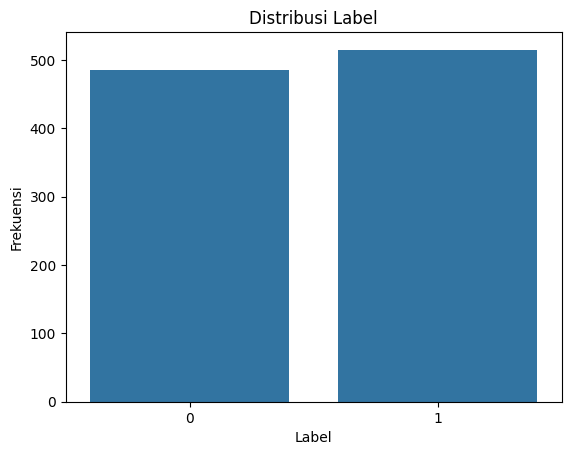

In [3]:
# Melihat informasi dasar dari dataset
print(df.info())

# Melihat statistik deskriptif
print(df.describe())

# Visualisasi distribusi label
sns.countplot(x='label', data=df)
plt.title('Distribusi Label')
plt.xlabel('Label')
plt.ylabel('Frekuensi')
plt.show()

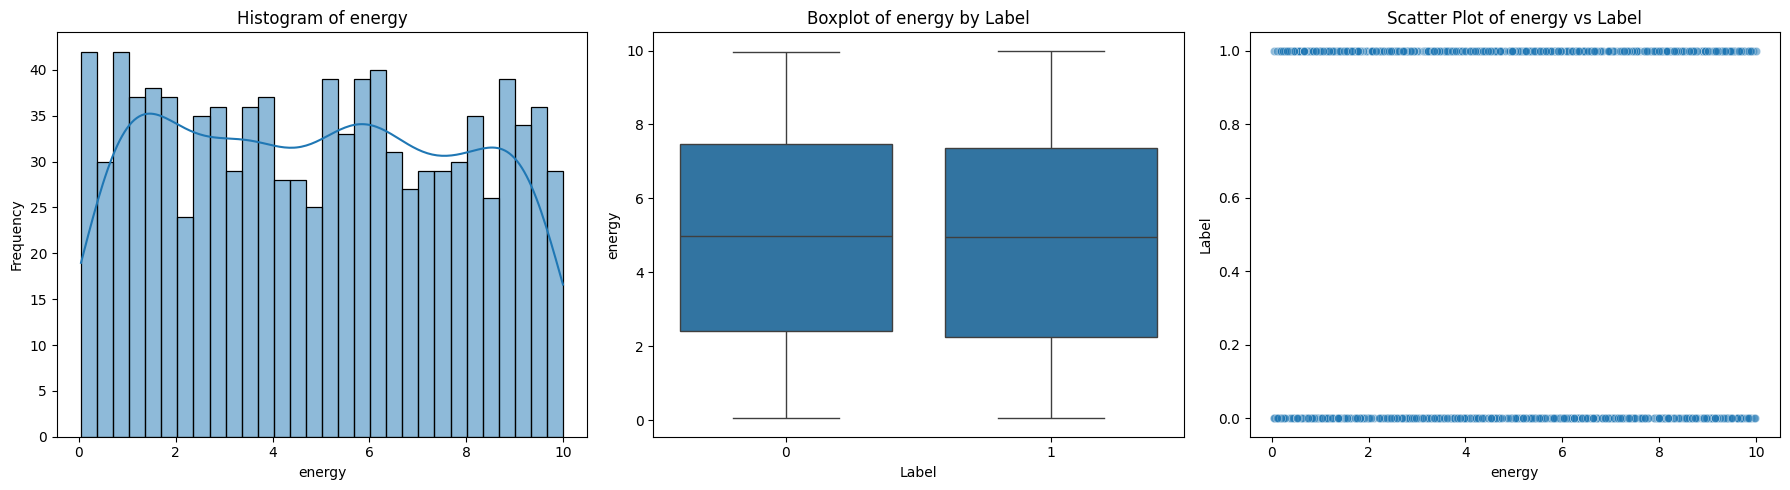

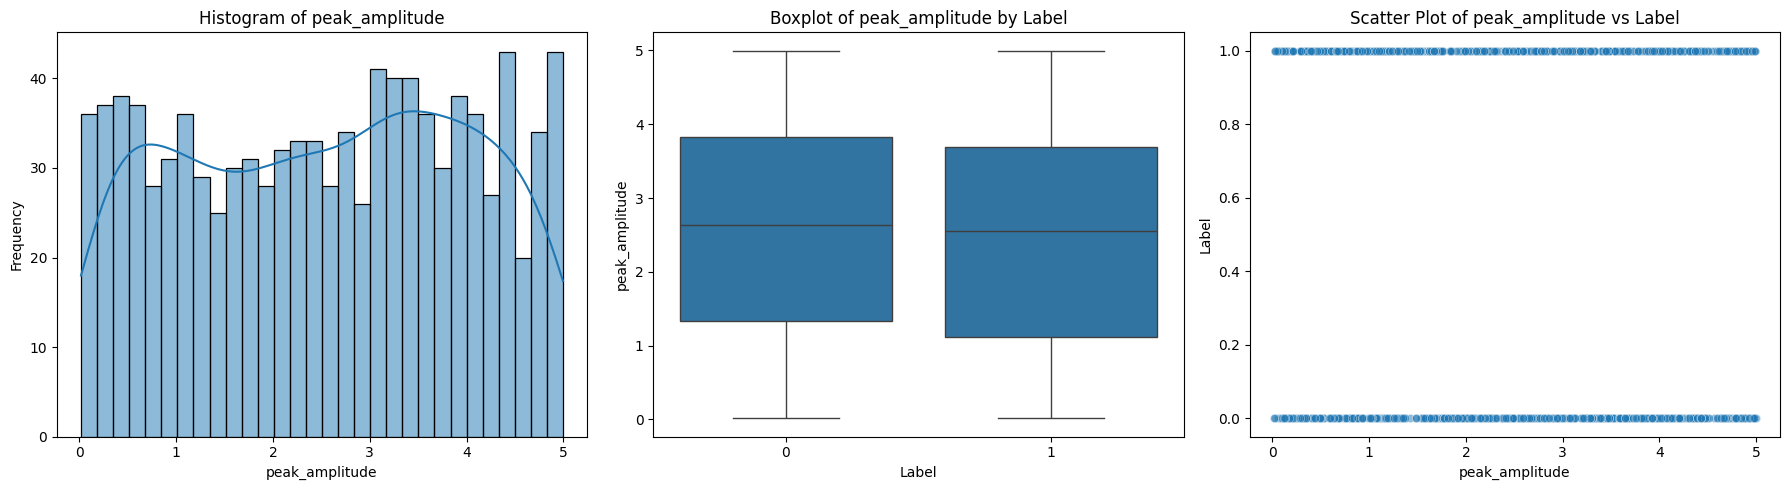

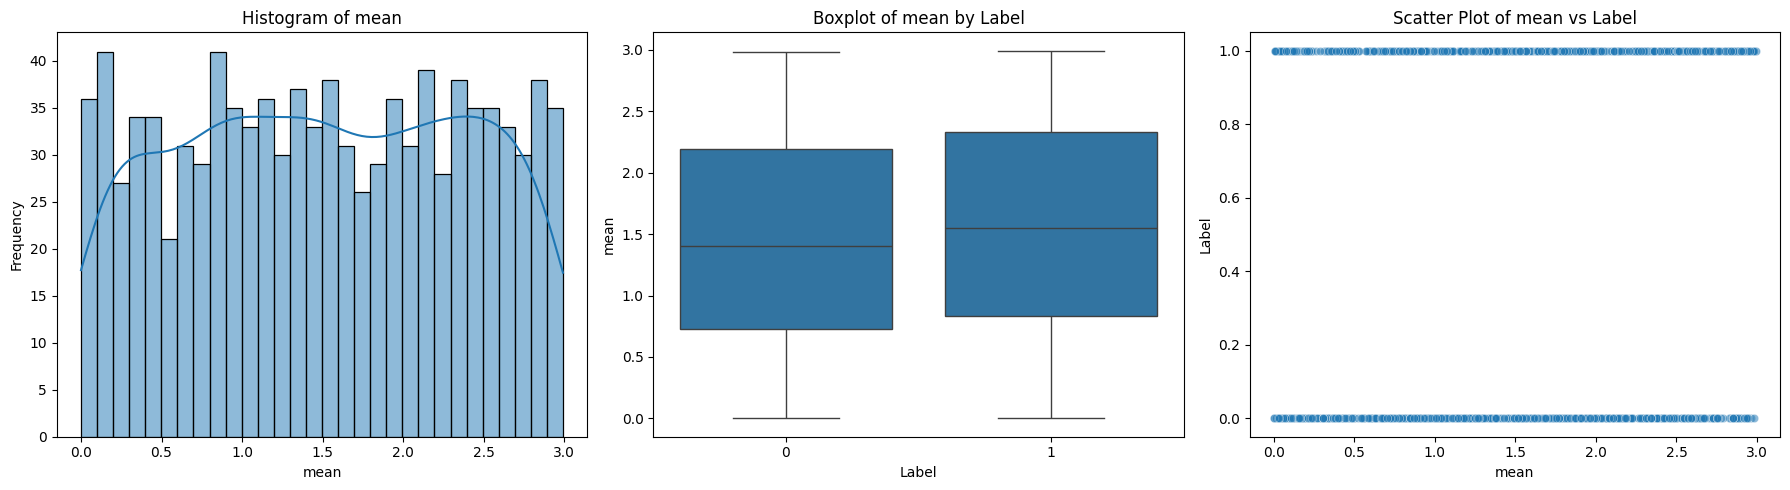

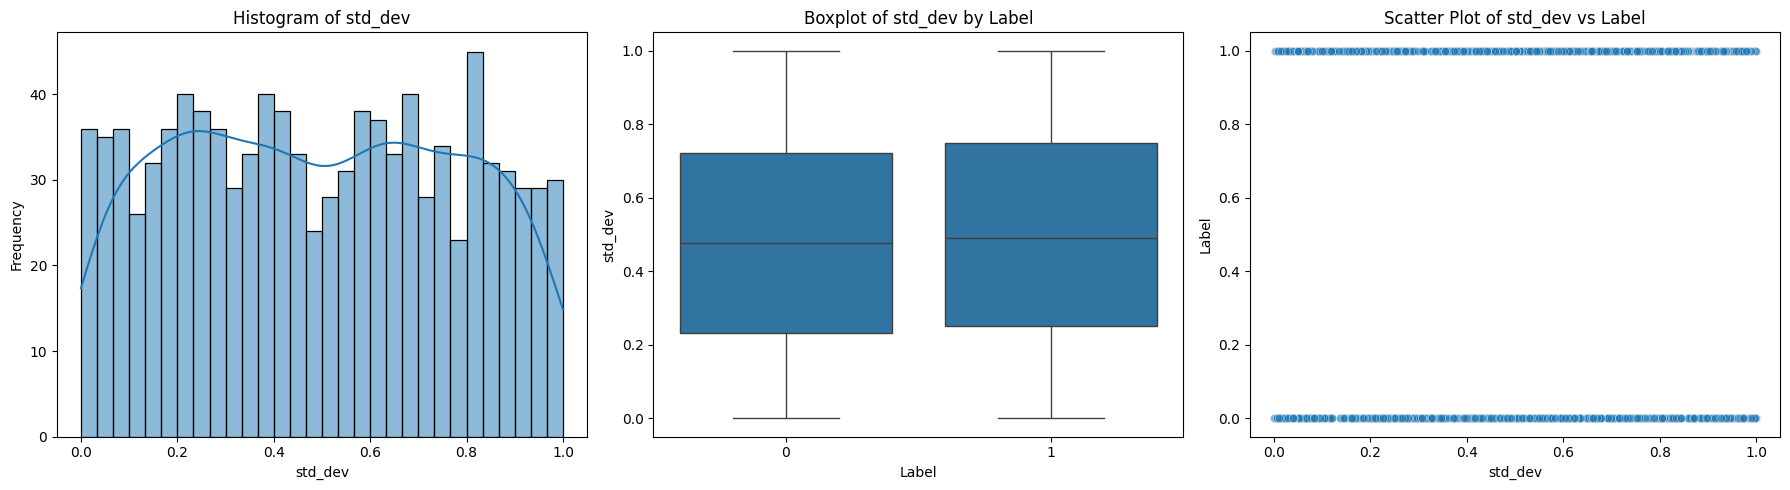

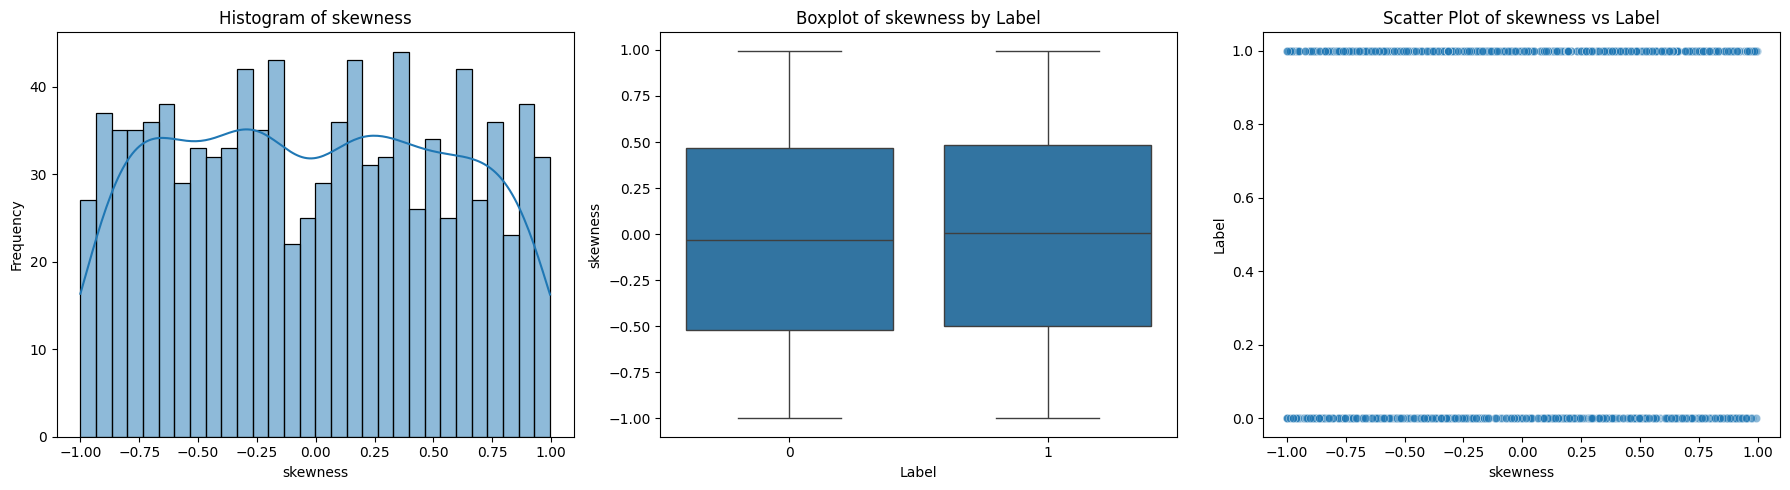

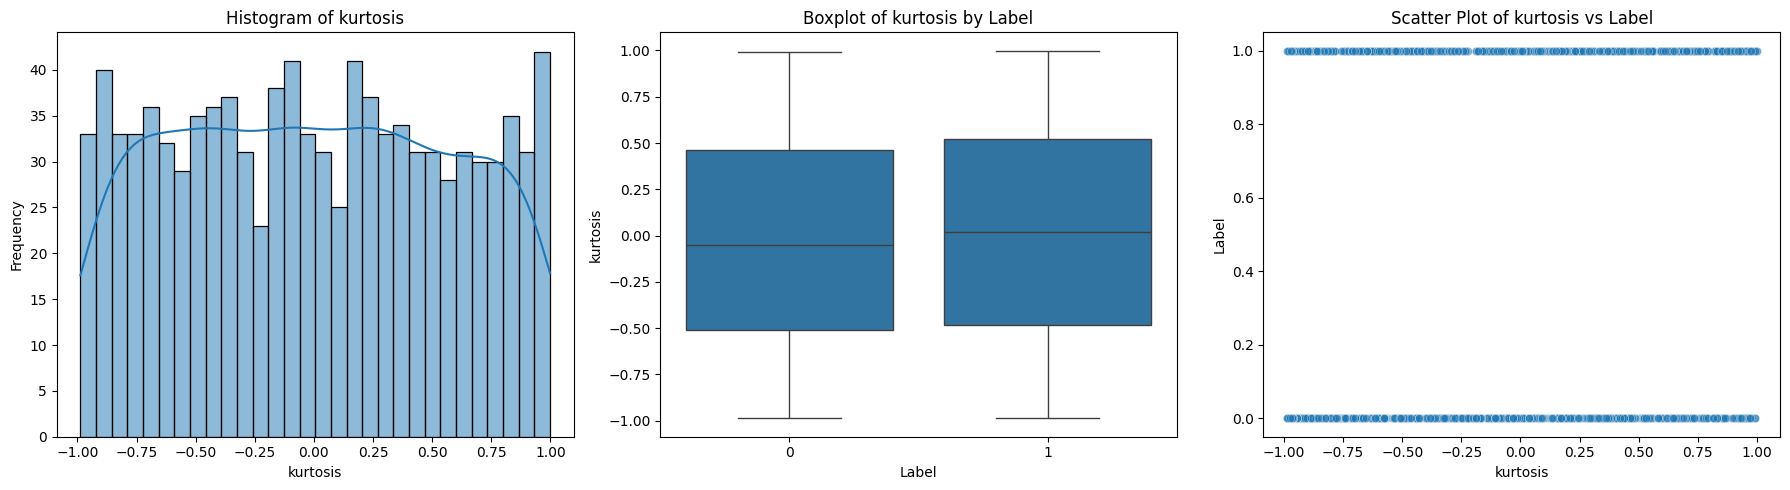

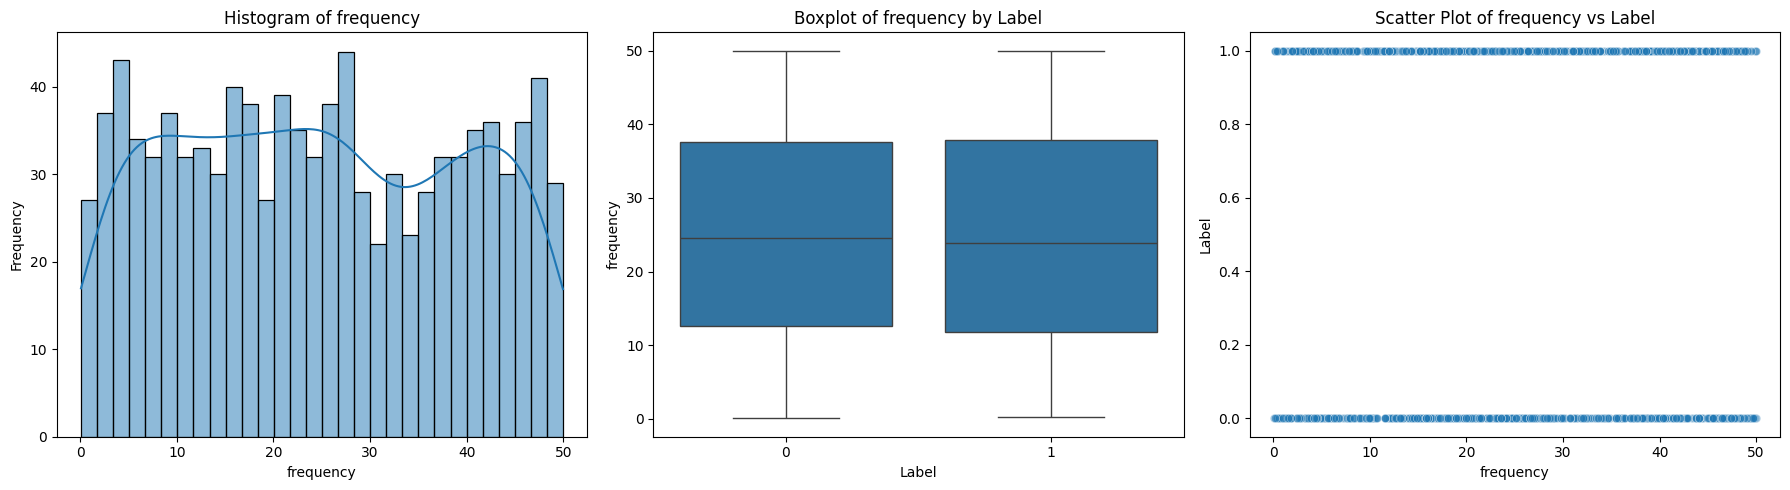

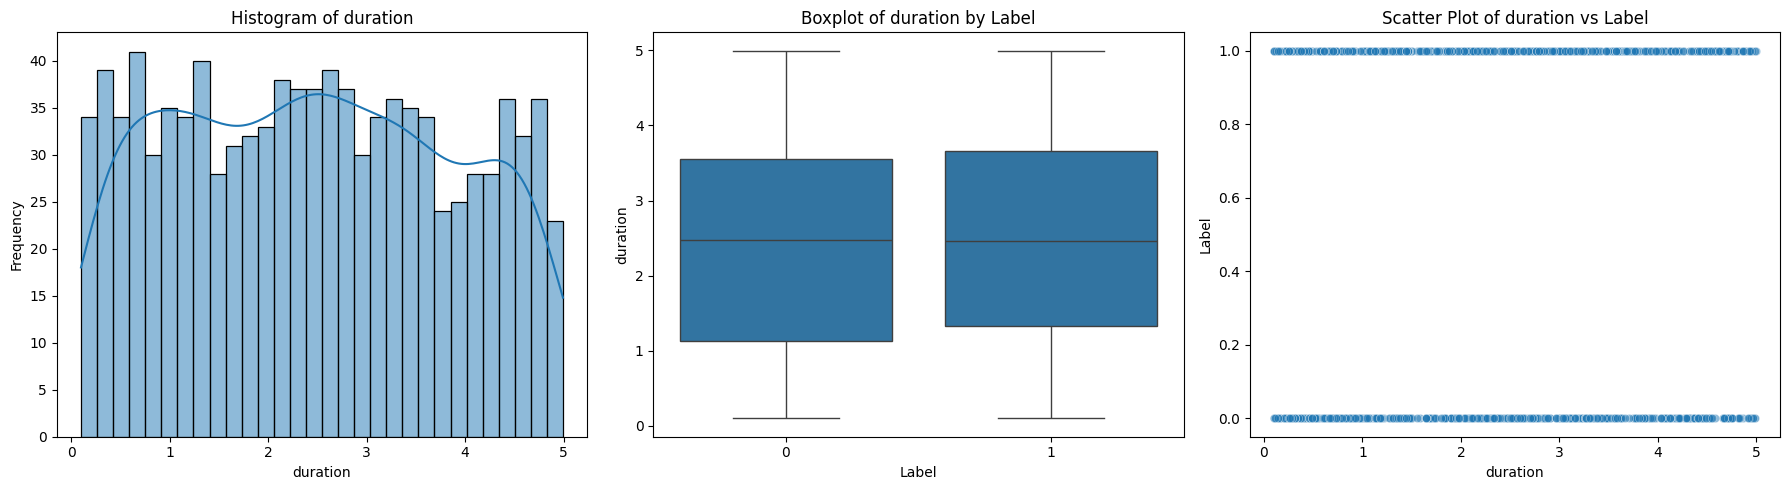

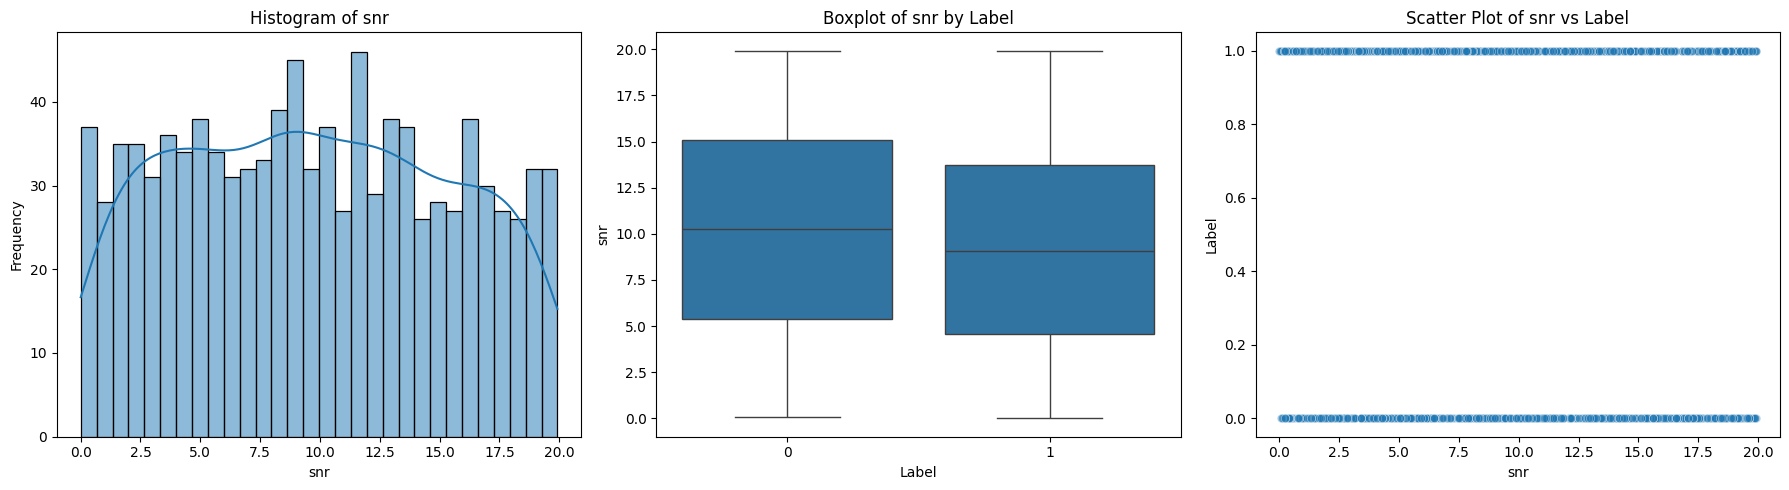

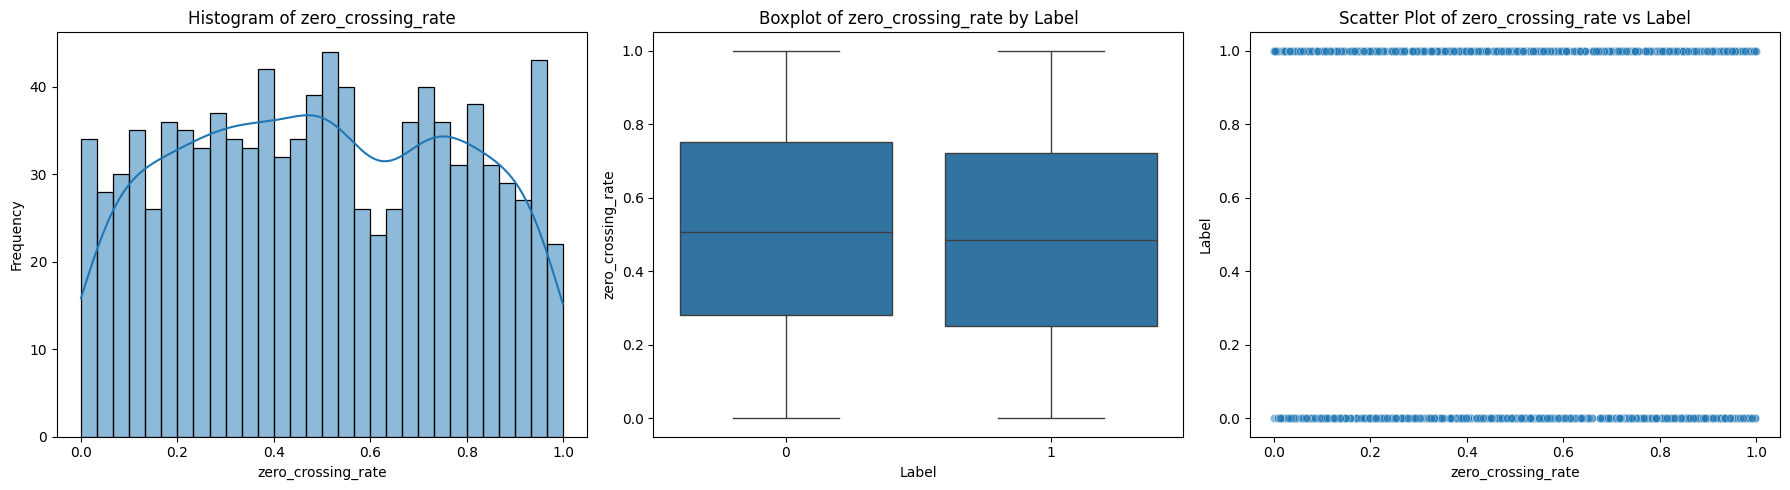

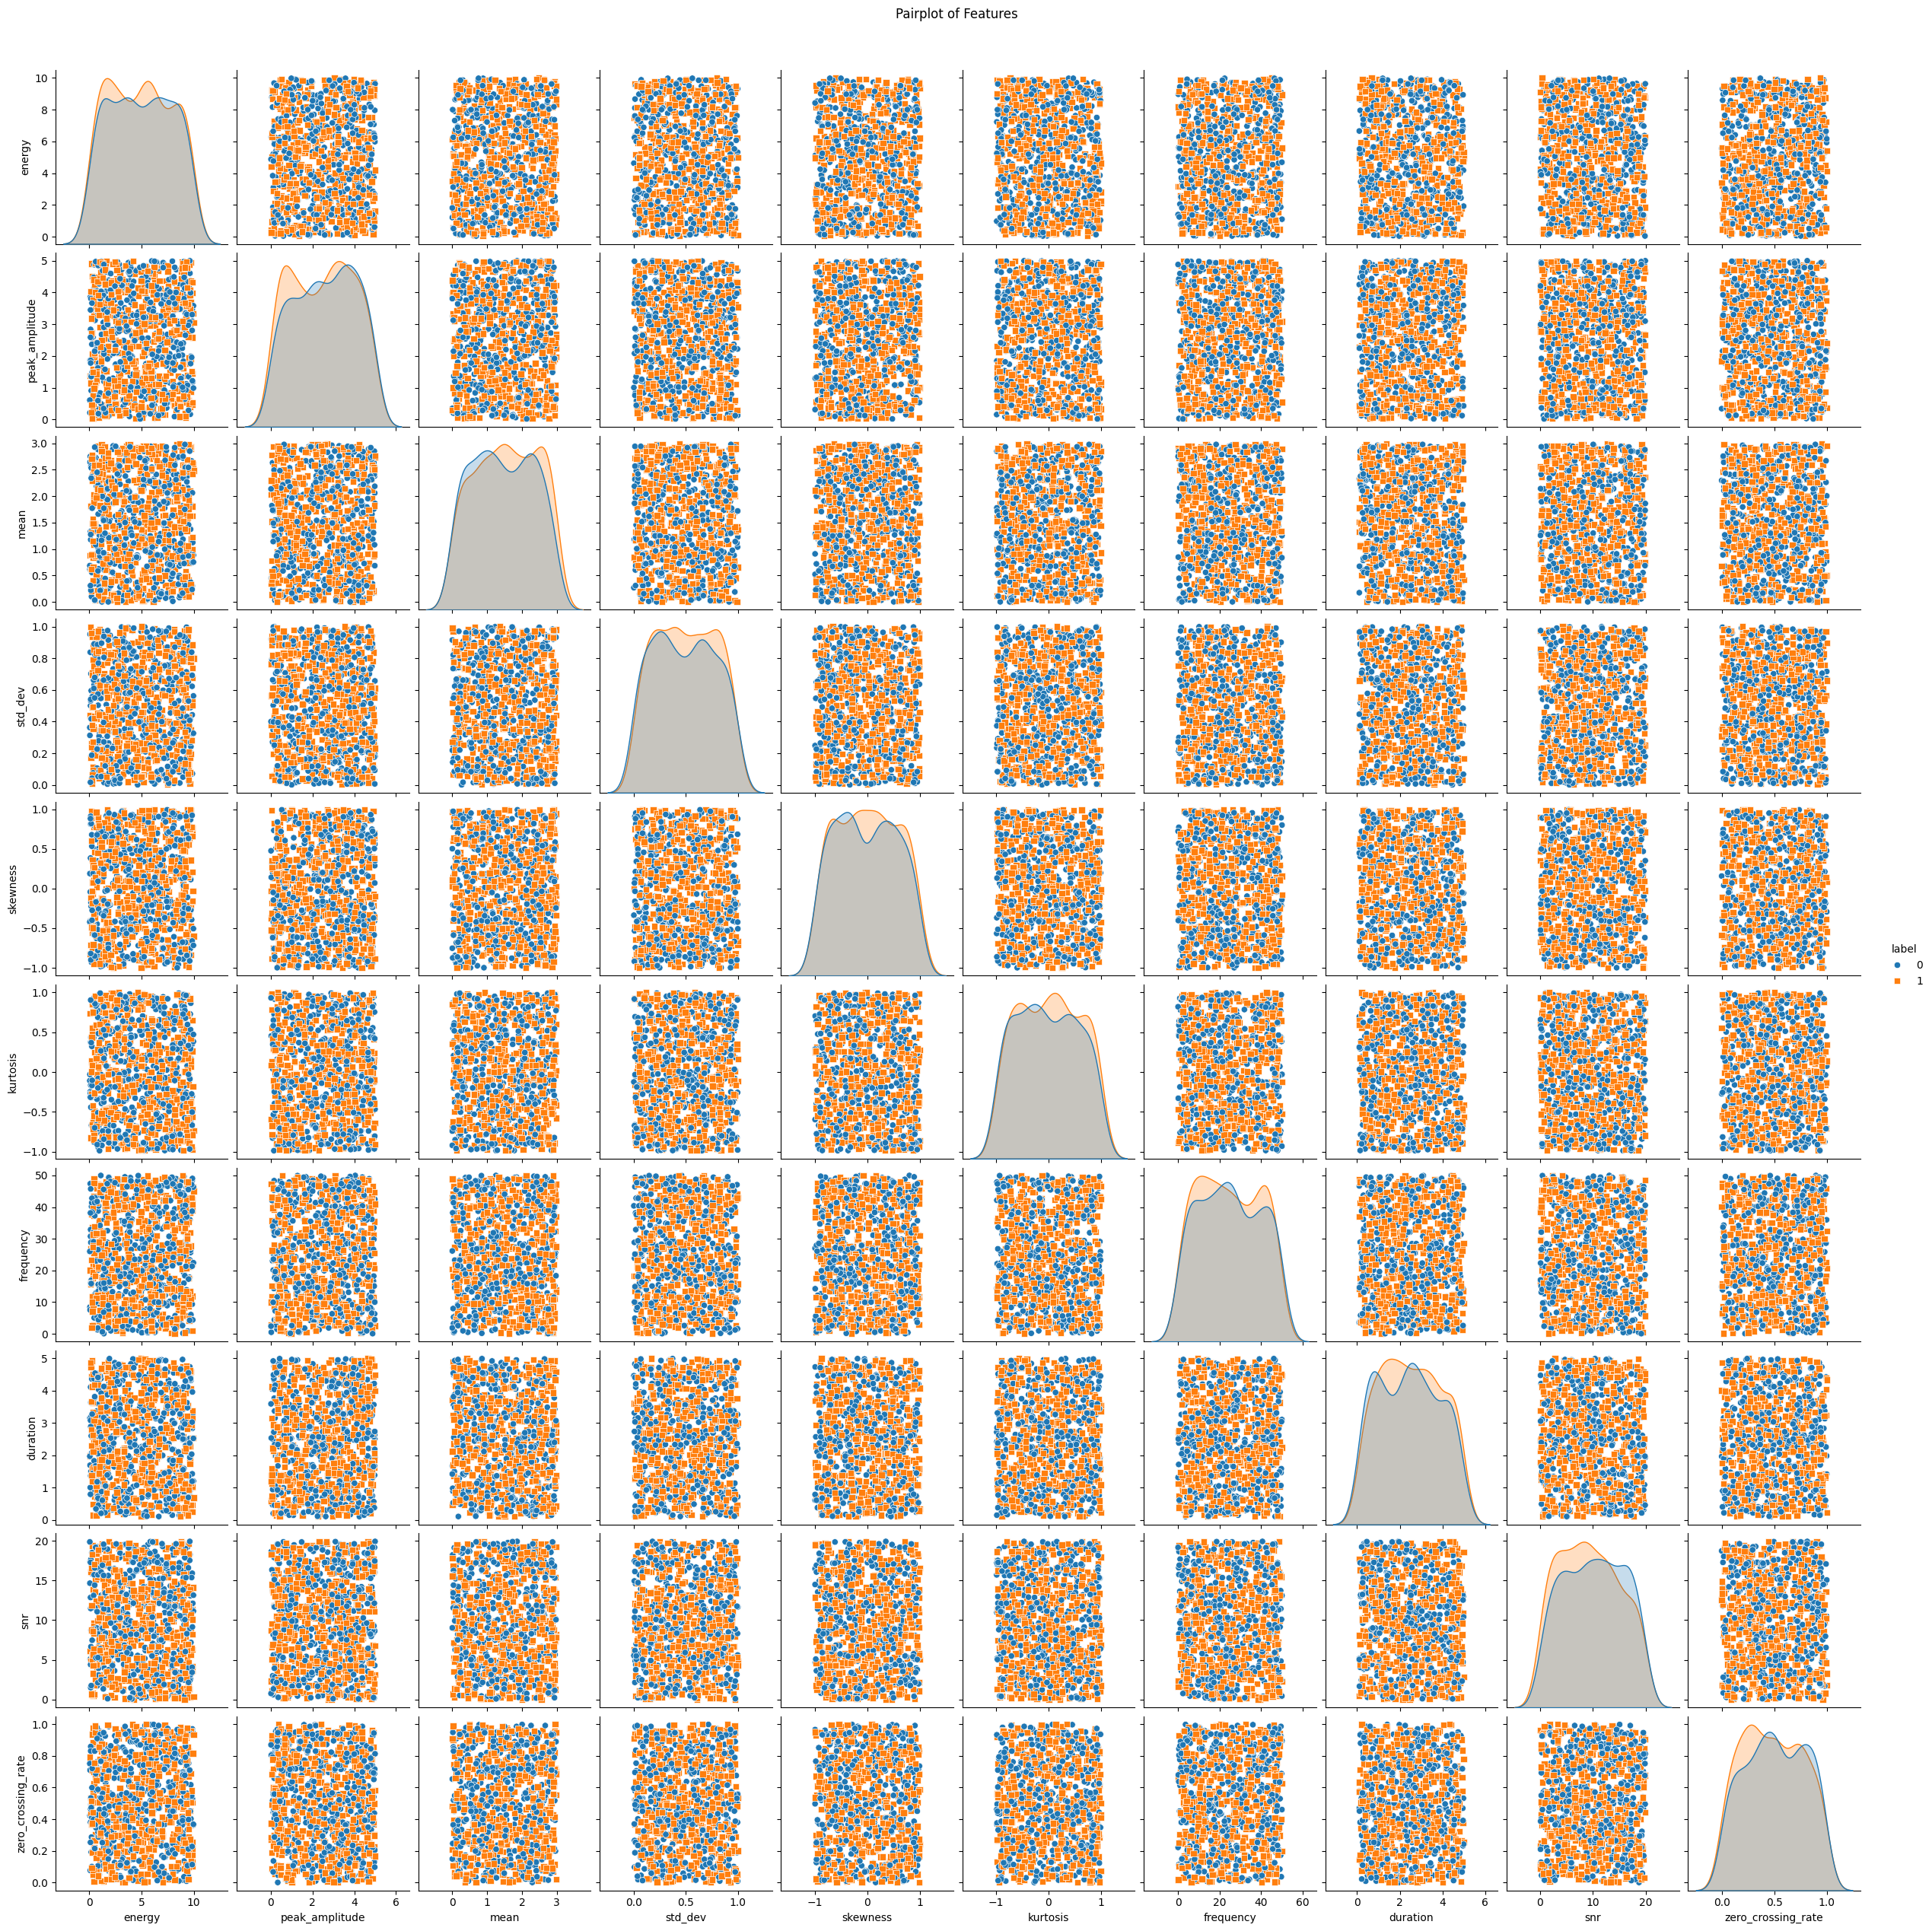

In [4]:
# Daftar fitur
features = list(data.keys())

# Membuat grafik untuk masing-masing fitur
for feature in features:
    plt.figure(figsize=(18, 5))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x='label', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Label')
    plt.xlabel('Label')
    plt.ylabel(feature)

    # Scatter Plot
    plt.subplot(1, 3, 3)
    sns.scatterplot(x=feature, y='label', data=df, alpha=0.5)
    plt.title(f'Scatter Plot of {feature} vs Label')
    plt.xlabel(feature)
    plt.ylabel('Label')

    plt.tight_layout()
    plt.show()

# Pairplot untuk melihat hubungan antar fitur
sns.pairplot(df, hue='label', diag_kind='kde', markers=["o", "s"])
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

PREPROCESSING DATA

In [5]:
# Memisahkan fitur dan label
X = df.drop('label', axis=1)
y = df['label']

# Membagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

PELATIHAN MODEL

In [6]:
# Membuat model K-Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors=5)

# Melatih model
knn.fit(X_train, y_train)

KNeighborsClassifier()

PENGUJIAN MODEL

In [7]:
# Memprediksi label untuk set pengujian
y_pred = knn.predict(X_test)

# Menghitung matriks kebingungan
cm = confusion_matrix(y_test, y_pred)

# Menghitung laporan klasifikasi
report = classification_report(y_test, y_pred, output_dict=True)
# Menampilkan hasil evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))
print("\nMatriks Kebingungan:\n", confusion_matrix(y_test, y_pred))

Akurasi: 0.58

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.60      0.47      0.53       100
           1       0.57      0.69      0.62       100

    accuracy                           0.58       200
   macro avg       0.58      0.58      0.57       200
weighted avg       0.58      0.58      0.57       200


Matriks Kebingungan:
 [[47 53]
 [31 69]]


INTERPRETASI

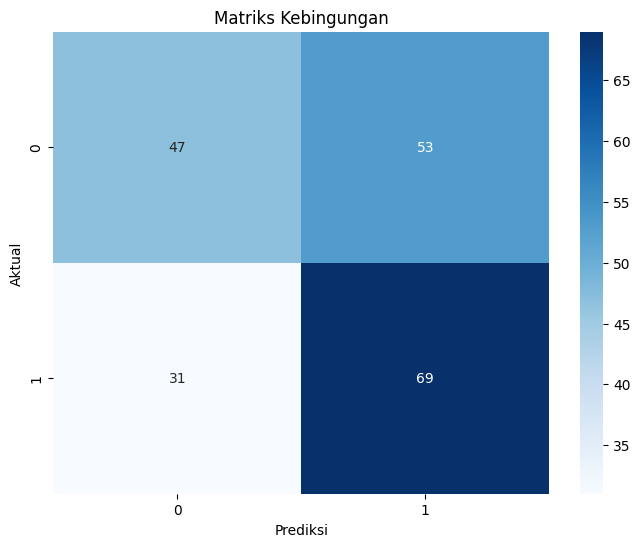

In [8]:
# Visualisasi matriks kebingungan
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriks Kebingungan')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

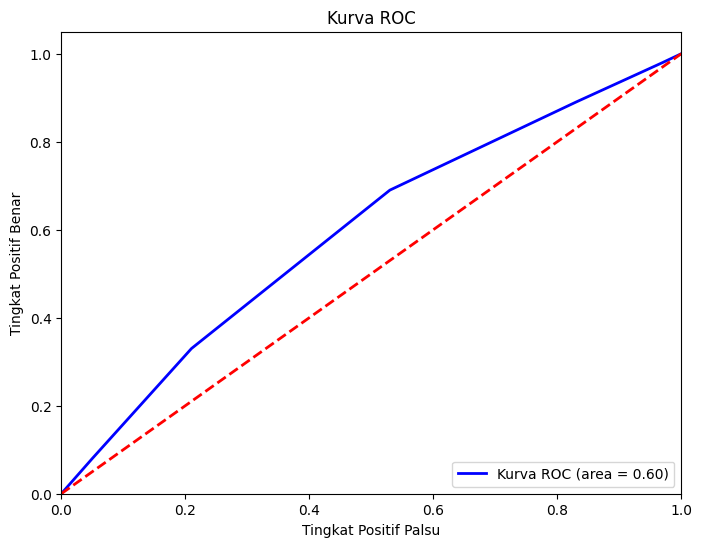

In [9]:
# Menghitung probabilitas prediksi
y_prob = knn.predict_proba(X_test)[:, 1]

# Menghitung nilai ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Visualisasi Kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Kurva ROC (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tingkat Positif Palsu')
plt.ylabel('Tingkat Positif Benar')
plt.title('Kurva ROC')
plt.legend(loc='lower right')
plt.show()

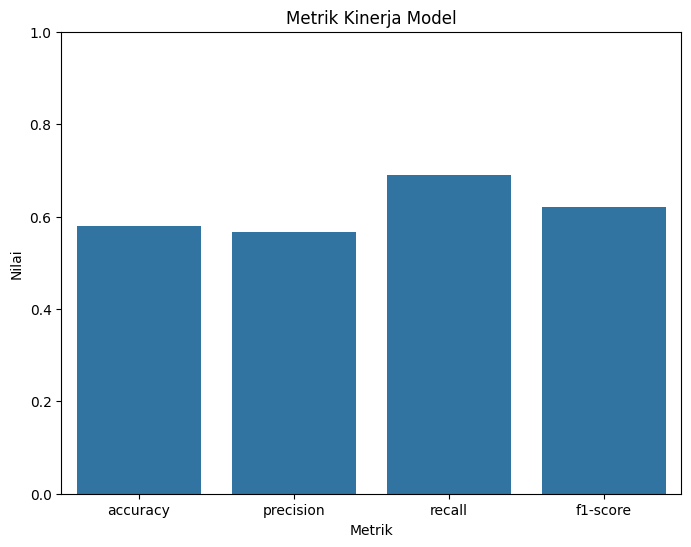

In [10]:
# Mengambil metrik dari laporan klasifikasi
metrics = ['accuracy', 'precision', 'recall', 'f1-score']
values = [report['accuracy'], report['1']['precision'], report['1']['recall'], report['1']['f1-score']]

# Visualisasi Metrik Kinerja
plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=values)
plt.title('Metrik Kinerja Model')
plt.ylabel('Nilai')
plt.xlabel('Metrik')
plt.ylim(0, 1)
plt.show()

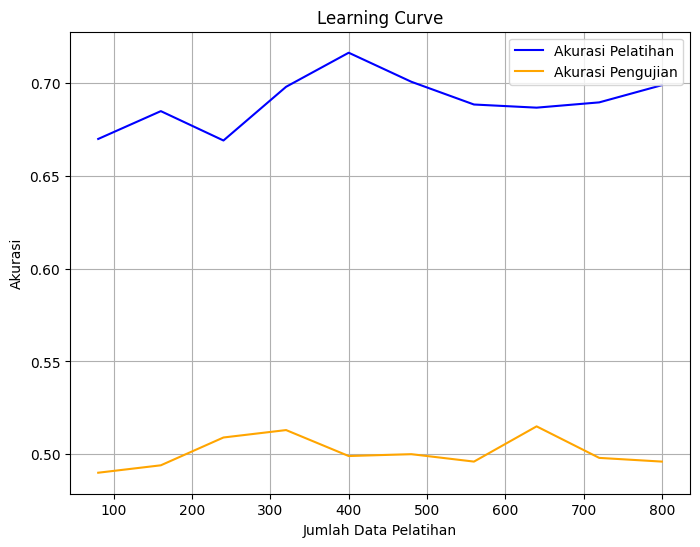

In [11]:
train_sizes, train_scores, test_scores = learning_curve(knn, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Visualisasi Learning Curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Akurasi Pelatihan', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Akurasi Pengujian', color='orange')
plt.title('Learning Curve')
plt.xlabel('Jumlah Data Pelatihan')
plt.ylabel('Akurasi')
plt.legend(loc='best')
plt.grid()
plt.show()